In [2]:
import pandas as pd

df = pd.read_csv("./classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


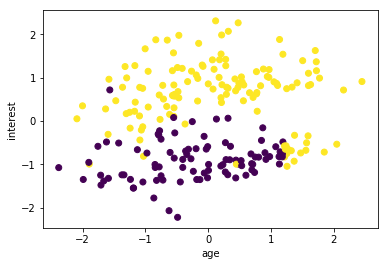

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("age")
plt.ylabel("interest")
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_predicted = model.predict(X_test)

0.88


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


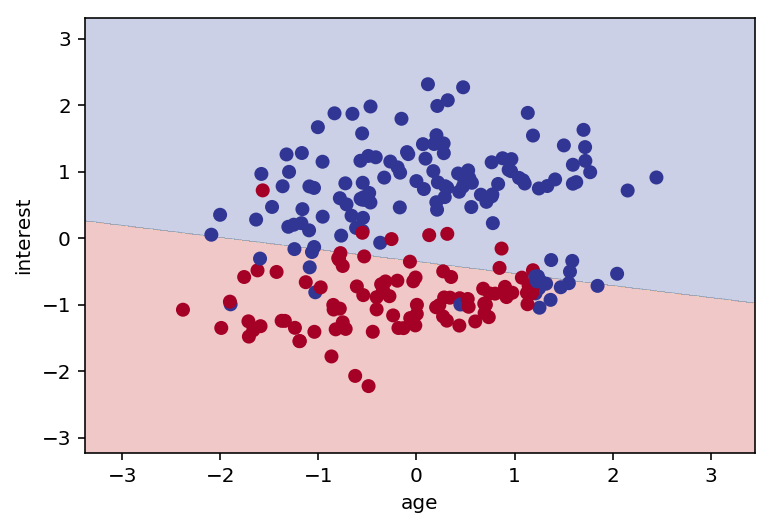

In [17]:
from helper import plot_classifier

plot_classifier(model, X_train, y_train, proba = False, xlabel = "age", ylabel = "interest")

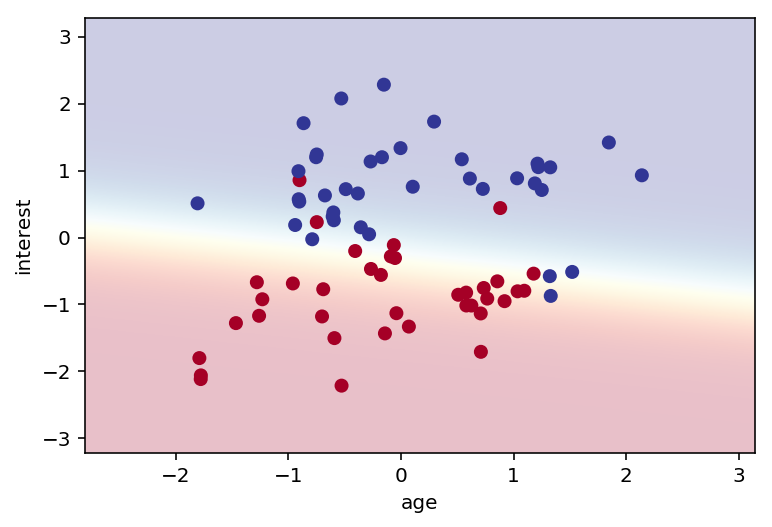

In [19]:
plot_classifier(model, X_test, y_test, proba = True, xlabel = "age", ylabel = "interest")

In [37]:
import numpy as np





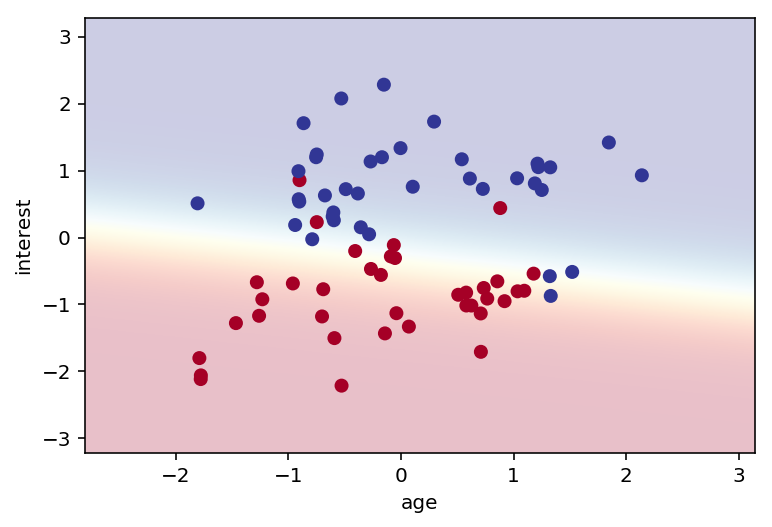

In [24]:
%matplotlib inline
%config InlineBackend.figure_formats = set(["retina"])
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    get_ipython().magic('matplotlib inline')
    get_ipython().magic('config InlineBackend.figure_formats = set(["retina"])')
except NameError:
    pass

def plot_classifier(model, X, Z, proba = False, xlabel = None, ylabel = None):
    # https://matplotlib.org/examples/color/colormaps_reference.html
    plt.set_cmap("RdYlBu")
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000)
    )

    if proba:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        plt.imshow(zz.reshape(xx.shape), 
                   origin = "lower", 
                   aspect = "auto", 
                   extent = (x_min, x_max, y_min, y_max), 
                   vmin = 0, 
                   vmax = 1, 
                   alpha = 0.25)
    else: 
        zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
        plt.contourf(xx, yy, zz.reshape(xx.shape), 
                     alpha = 0.25, 
                     vmin = 0, 
                     vmax = 1)

    plt.scatter(X[:, 0], X[:, 1], c=Z)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
       
    if ylabel is not None:
        plt.ylabel(ylabel)
        
    # This will display the graphic the same size as the
    # Shaded color range... #
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()
    
plot_classifier(model, X_test, y_test, proba = True, xlabel = "age", ylabel = "interest")